In [1]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

def forward(x, parameters, activation='relu'):
    caches = []
    A = x
    L = len(parameters) // 2  

    for l in range(1, L + 1):
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        Z = np.dot(W, A) + b
        caches.append((A, Z))
        if activation == 'relu':
            A = relu(Z)
        elif activation == 'sigmoid':
            A = sigmoid(Z)
        else:
            raise ValueError("Unsupported activation function")
    
    AL = A
    return AL, caches

def backward(dAL, caches, parameters, activation='relu'):
   
    grads = {}
    L = len(caches)  

    A_prev, Z = caches[-1]
    if activation == 'relu':
        dZ = dAL * relu_deriv(Z)
    elif activation == 'sigmoid':
        dZ = dAL * sigmoid_deriv(Z)
    else:
        raise ValueError("Unsupported activation function")
    

    grads["dW" + str(L)] = np.einsum('ik,jk->ij', dZ, A_prev)
    grads["db" + str(L)] = np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(parameters["W" + str(L)].T, dZ)

    for l in range(L - 1, 0, -1):
        A_prev, Z = caches[l - 1]
        if activation == 'relu':
            dZ = dA_prev * relu_deriv(Z)
        elif activation == 'sigmoid':
            dZ = dA_prev * sigmoid_deriv(Z)
        grads["dW" + str(l)] = np.einsum('ik,jk->ij', dZ, A_prev)
        grads["db" + str(l)] = np.sum(dZ, axis=1, keepdims=True)
        if l > 1:
            dA_prev = np.dot(parameters["W" + str(l)].T, dZ)
    
    return grads

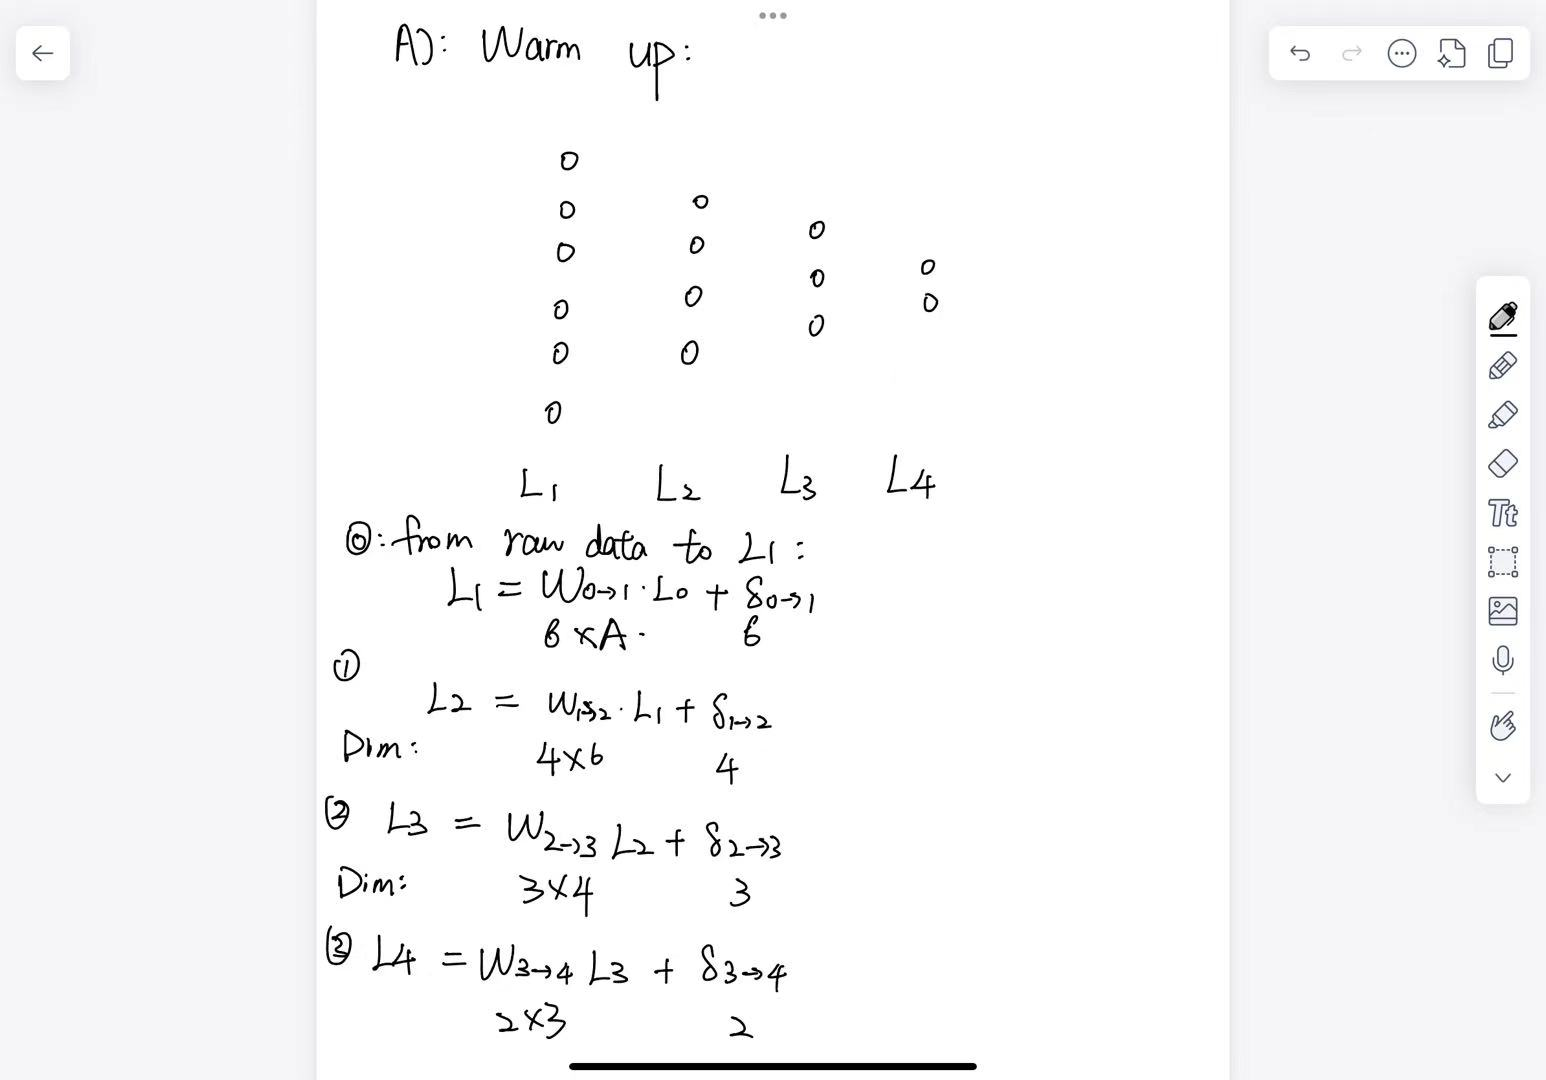

In [2]:
# --- Example Usage ---

# Define network architecture: input 6, then layers with 6, 4, 3, and 2 neurons.
layer_dims = [6, 6, 4, 3, 2]
parameters = {}
np.random.seed(42)  
L = len(layer_dims) - 1  

for l in range(1, L + 1):
    parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
    parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    
x = np.random.randn(6, 1)

# Forward pass
AL, caches = forward(x, parameters, activation='sigmoid')
print("Forward propagation output (AL):\n", AL)
    
# Assume a dummy derivative from the loss (e.g., from mean squared error)
# For our output layer with 2 neurons, dAL has shape (2, 1)
dAL = np.random.randn(2, 1)

# Backward pass to compute gradients
grads = backward(dAL, caches, parameters, activation='sigmoid')

# Print gradients for each layer
for l in range(1, L + 1):
    print(f"\nGradients for Layer {l}:")
    print("dW" + str(l) + ":\n", grads["dW" + str(l)])
    print("db" + str(l) + ":\n", grads["db" + str(l)])

Forward propagation output (AL):
 [[0.49863851]
 [0.50075413]]

Gradients for Layer 1:
dW1:
 [[ 1.26488930e-09 -2.73979226e-08 -3.02809797e-09  4.92266836e-09
   2.03722379e-08 -7.14416856e-09]
 [ 4.16995430e-10 -9.03225959e-09 -9.98271557e-10  1.62285364e-09
   6.71610557e-09 -2.35521451e-09]
 [ 1.06951551e-09 -2.31660615e-08 -2.56038038e-09  4.16231695e-09
   1.72255583e-08 -6.04068600e-09]
 [ 3.36203080e-10 -7.28227044e-09 -8.04857674e-10  1.30842775e-09
   5.41486840e-09 -1.89889460e-09]
 [ 4.95193484e-10 -1.07260554e-08 -1.18547479e-09  1.92718311e-09
   7.97555915e-09 -2.79688168e-09]
 [ 1.07490250e-11 -2.32827455e-10 -2.57327664e-11  4.18328192e-11
   1.73123209e-10 -6.07111204e-11]]
db1:
 [[1.37846403e-08]
 [4.54437555e-09]
 [1.16554758e-08]
 [3.66390840e-09]
 [5.39657032e-09]
 [1.17141827e-10]]

Gradients for Layer 2:
dW2:
 [[-4.64793566e-08 -4.60100809e-08 -4.69072904e-08 -4.70964132e-08
  -4.62203650e-08 -4.58394542e-08]
 [-2.48009333e-06 -2.45505324e-06 -2.50292747e-06 -2.5

# Task 2

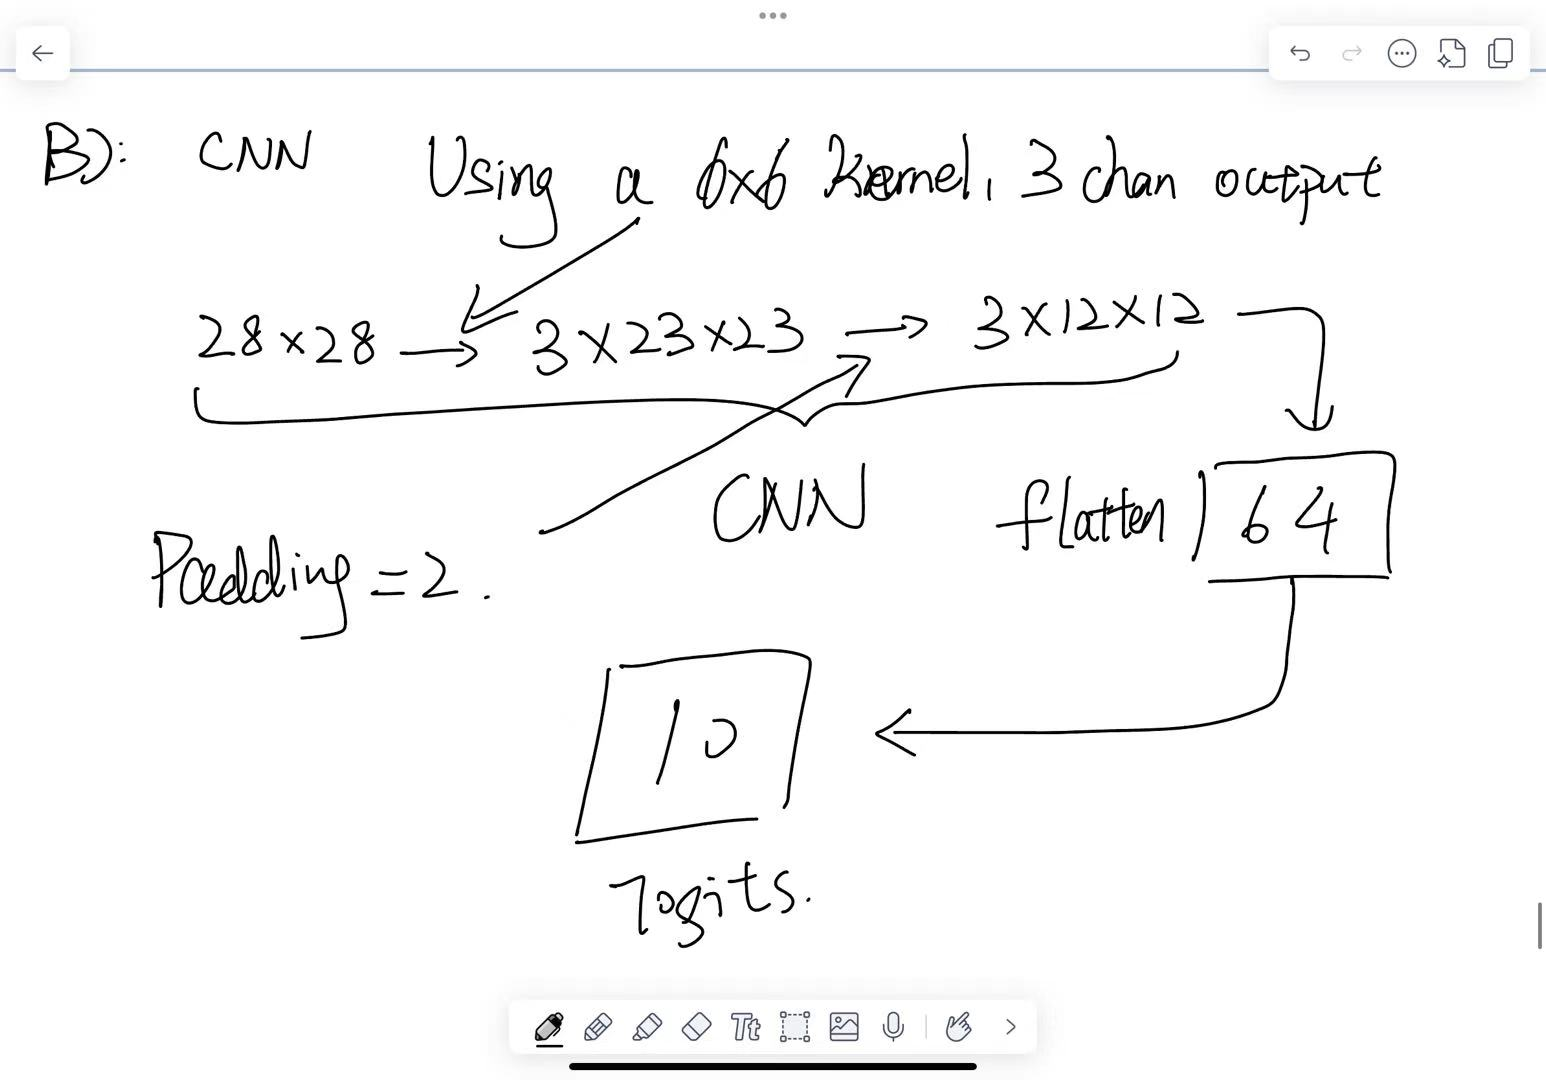

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

class CNN:
    def __init__(self, kernel_size=3, num_filters=8, pool_size=2, num_classes=10):
        """
        Initializes a simple CNN for MNIST.
        - Convolutional layer: 3x3 filters, 'num_filters' filters.
        - Pooling layer: 2x2 max pooling.
        - Fully connected layer: flattens and outputs 'num_classes' scores.
        
        The input image is assumed to be 28x28x1.
        """
        self.kernel_size = kernel_size
        self.num_filters = num_filters
        self.pool_size = pool_size
        self.num_classes = num_classes
        
        # Initialize convolutional layer parameters.
        # Weight shape: (kernel_size, kernel_size, input_channels, num_filters)
        # For MNIST, input_channels = 1.
        self.W_conv = np.random.randn(kernel_size, kernel_size, 1, num_filters) * 0.01
        self.b_conv = np.zeros((1, 1, 1, num_filters))
        
        # After convolution:
        #   Output height/width = 28 - 3 + 1 = 26.
        # After 2x2 pooling with stride 2:
        #   Output height/width = 26 // 2 = 13.
        self.conv_out_height = 26
        self.conv_out_width  = 26
        self.pool_out_height = self.conv_out_height // pool_size
        self.pool_out_width  = self.conv_out_width  // pool_size
        
        # Fully connected layer parameters.
        self.fc_input_dim = self.pool_out_height * self.pool_out_width * num_filters  # 13*13*8 = 1352
        self.W_fc = np.random.randn(num_classes, self.fc_input_dim) * 0.01
        self.b_fc = np.zeros((num_classes, 1))
        
    def forward(self, X):
        """
        Forward propagation for the CNN.
        
        Arguments:
        - X: Input image, a numpy array of shape (28, 28, 1).
        
        Returns:
        - out_fc: Output of the fully connected layer (before any softmax),
                  shape (num_classes, 1).
        Also stores intermediate values needed for backpropagation.
        """
        # Store input for backpropagation.
        self.X = X  # shape: (28,28,1)
        
        # ---- Convolutional Layer Forward ----
        H, W, C = X.shape  # (28, 28, 1)
        out_conv = np.zeros((H - self.kernel_size + 1, W - self.kernel_size + 1, self.num_filters))
        # Naive convolution (no padding, stride=1)
        for i in range(out_conv.shape[0]):
            for j in range(out_conv.shape[1]):
                # Extract the current 3x3 patch from input.
                patch = X[i:i+self.kernel_size, j:j+self.kernel_size, :]  # shape: (3,3,1)
                for f in range(self.num_filters):
                    conv_sum = np.sum(patch * self.W_conv[:, :, :, f]) + self.b_conv[0, 0, 0, f]
                    out_conv[i, j, f] = conv_sum
        # Apply ReLU activation
        self.conv_out = relu(out_conv)  # shape: (26,26,num_filters)
        
        # ---- Pooling Layer Forward (Max Pooling) ----
        H_conv, W_conv, F = self.conv_out.shape  # (26,26,num_filters)
        H_pool = H_conv // self.pool_size  # 13
        W_pool = W_conv // self.pool_size  # 13
        out_pool = np.zeros((H_pool, W_pool, F))
        # To backpropagate through max pooling, record the mask.
        self.pool_mask = np.zeros_like(self.conv_out)
        for f in range(F):
            for i in range(H_pool):
                for j in range(W_pool):
                    h_start = i * self.pool_size
                    h_end = h_start + self.pool_size
                    w_start = j * self.pool_size
                    w_end = w_start + self.pool_size
                    patch = self.conv_out[h_start:h_end, w_start:w_end, f]
                    max_val = np.max(patch)
                    out_pool[i, j, f] = max_val
                    mask = (patch == max_val)
                    self.pool_mask[h_start:h_end, w_start:w_end, f] = mask
        self.pool_out = out_pool  
        
        self.flat = self.pool_out.reshape(-1, 1) 
        Z_fc = np.dot(self.W_fc, self.flat) + self.b_fc  
        self.fc_out = relu(Z_fc)
        return self.fc_out
    
    def backward(self, dZ_fc, learning_rate=0.01):
        """
        Backward propagation for the CNN.
        
        Arguments:
        - dZ_fc: Gradient of the loss with respect to the FC layer output (shape: (num_classes, 1)).
        - learning_rate: Learning rate for parameter updates.
        
        Returns:
        - Gradients for parameters (for illustration).
        """
        dW_fc = np.dot(dZ_fc, self.flat.T)  
        db_fc = dZ_fc  
        dflat = np.dot(self.W_fc.T, dZ_fc)  
        dpool = dflat.reshape(self.pool_out.shape)  
        
        dconv_out = np.zeros_like(self.conv_out)  # shape: (26,26,num_filters)
        H_pool, W_pool, F = self.pool_out.shape
        for f in range(F):
            for i in range(H_pool):
                for j in range(W_pool):
                    h_start = i * self.pool_size
                    h_end = h_start + self.pool_size
                    w_start = j * self.pool_size
                    w_end = w_start + self.pool_size
                    dconv_out[h_start:h_end, w_start:w_end, f] += self.pool_mask[h_start:h_end, w_start:w_end, f] * dpool[i, j, f]
        

        dconv_out[self.conv_out <= 0] = 0
        
        dW_conv = np.zeros_like(self.W_conv)  
        db_conv = np.zeros_like(self.b_conv)   
        H, W, C = self.X.shape  
        H_conv, W_conv, F = self.conv_out.shape  # (26,26,num_filters)
        for f in range(F):
            for i in range(H_conv):
                for j in range(W_conv):
                    patch = self.X[i:i+self.kernel_size, j:j+self.kernel_size, :]  # shape: (3,3,1)
                    dW_conv[:, :, :, f] += patch * dconv_out[i, j, f]
                    db_conv[0, 0, 0, f] += dconv_out[i, j, f]
        
        # ---- Parameter Update ----
        self.W_fc -= learning_rate * dW_fc
        self.b_fc -= learning_rate * db_fc
        self.W_conv -= learning_rate * dW_conv
        self.b_conv -= learning_rate * db_conv
        
        return dW_fc, db_fc, dW_conv, db_conv

np.random.seed(42)
cnn = CNN(kernel_size=3, num_filters=8, pool_size=2, num_classes=10)

X = np.random.randn(28, 28, 1)
out = cnn.forward(X)
print("CNN forward output (FC layer activations):\n", out)


dZ_fc = np.random.randn(10, 1)
grads = cnn.backward(dZ_fc, learning_rate=0.01)

print("\nParameter gradients computed during backward propagation:")
print("dW_fc shape:", grads[0].shape)
print("dW_conv shape:", grads[2].shape)


# Task 3

In [4]:
import random
import matplotlib.pyplot as plt
import kagglehub
import numpy as np 
import struct
from array import array
from os.path  import join
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
from tqdm import tqdm  # Standard tqdm package
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
#####################################
## Install the training material
#####################################
path = kagglehub.dataset_download("hojjatk/mnist-dataset")
print("Path to dataset files:", path)
data_set_location = r"C:\Users\Eric\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1"

100%|██████████| 22.0M/22.0M [00:00<00:00, 65.0MB/s]

Extracting files...


Path to dataset files: C:\Users\Eric\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1


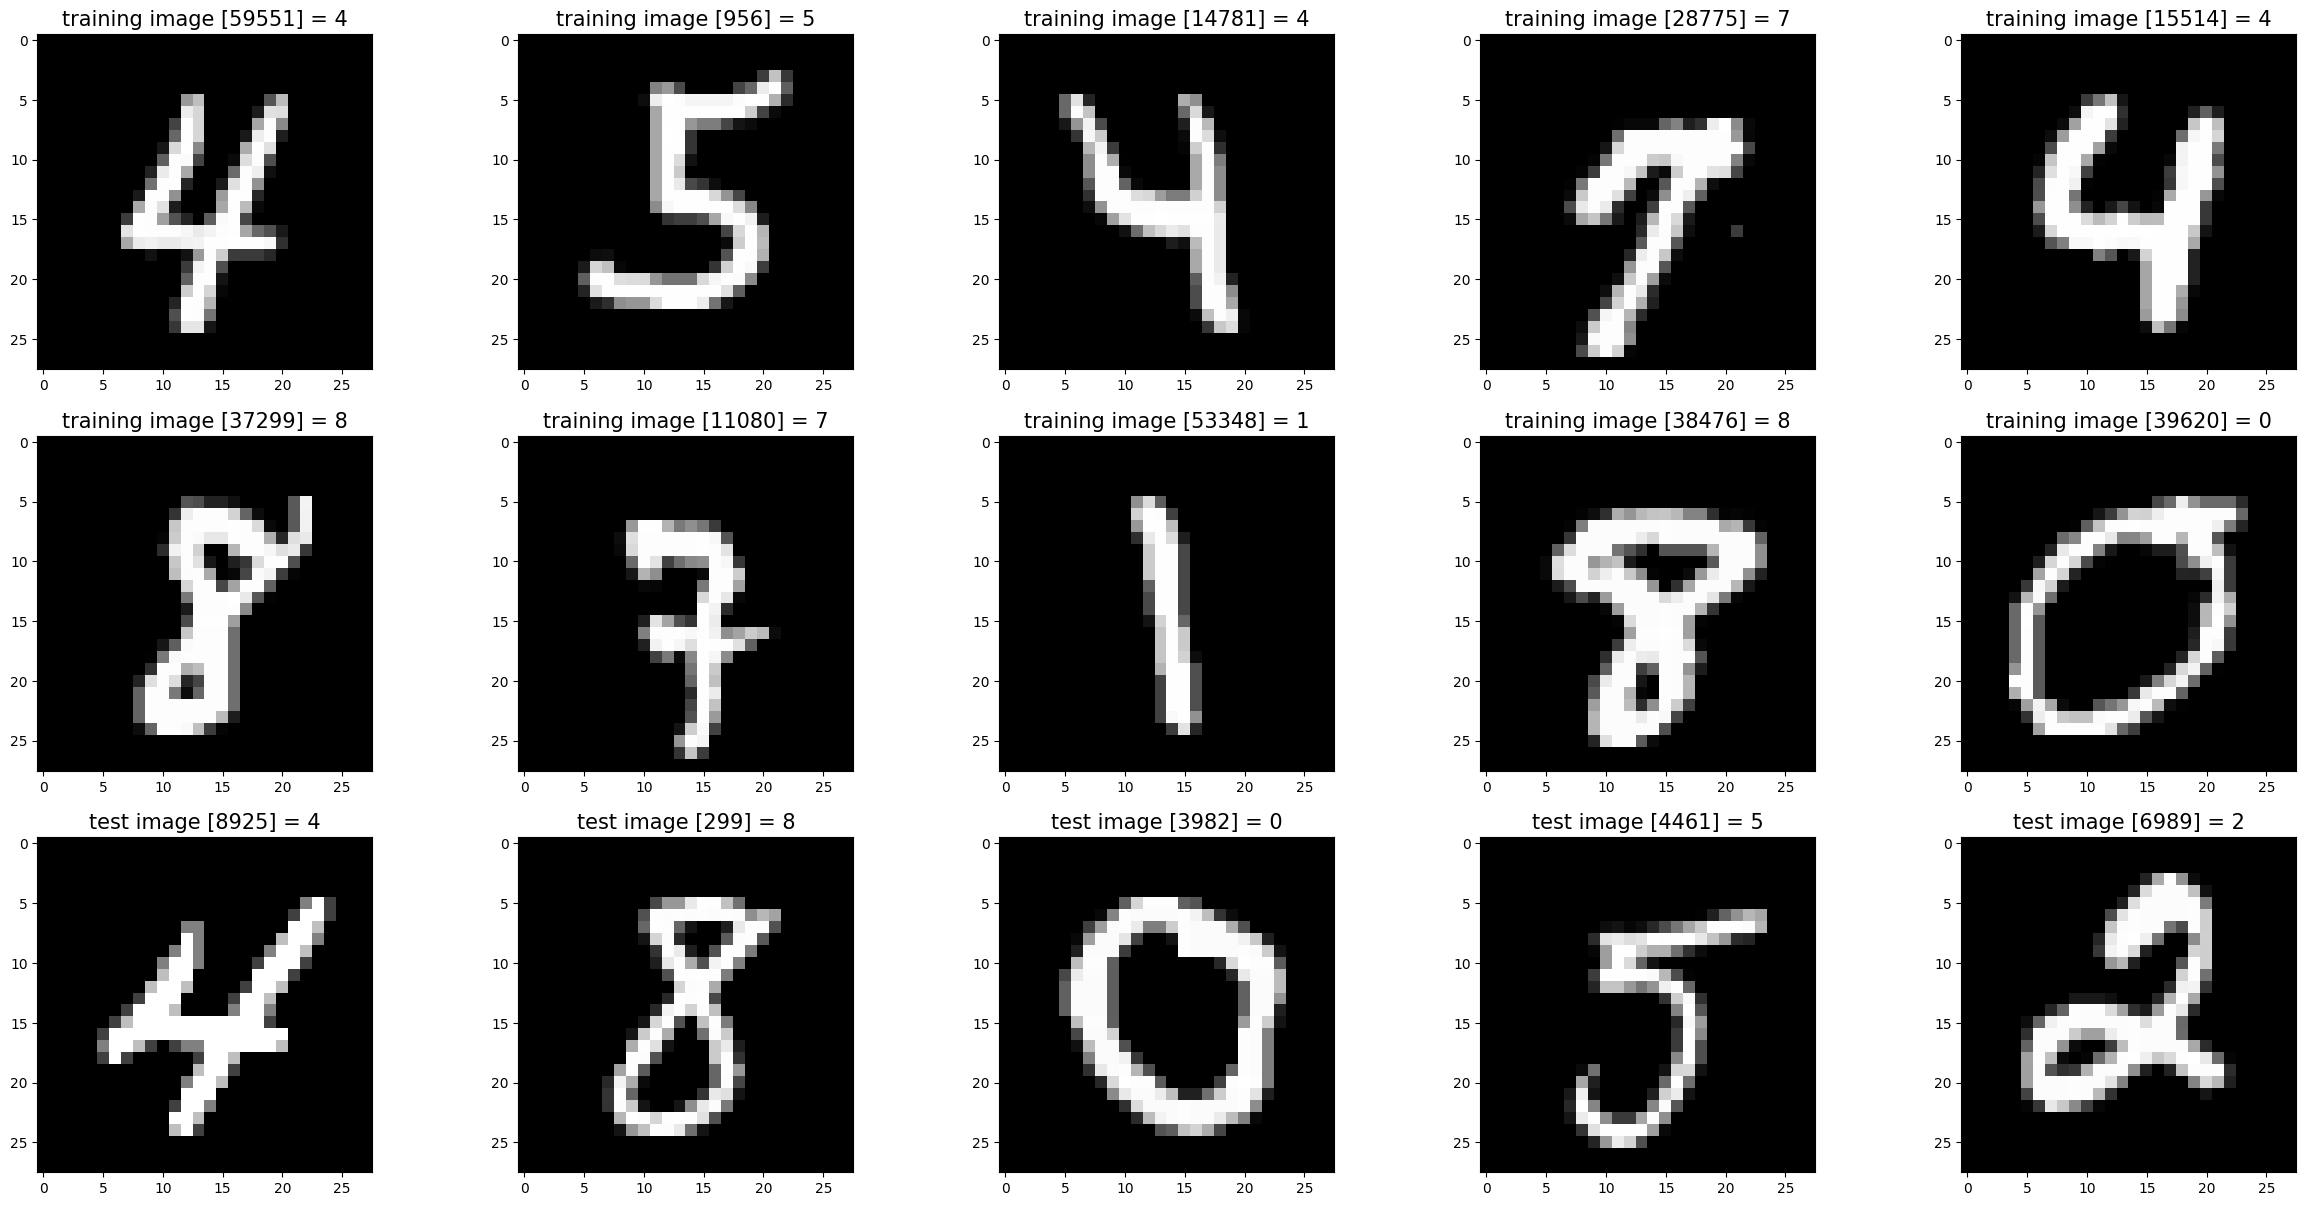

In [5]:
###############################################################################################################
## Define the loading function for the training material, obtained from the example given in the link
###############################################################################################################
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 
    


###############################################################################################################
## Example loading
###############################################################################################################
input_path = r"C:\Users\Eric\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1"
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [ ]:
# ---------------------------------------------------------------------------------
# Set up file paths for the MNIST dataset (adjust these paths as needed)
# ---------------------------------------------------------------------------------
input_path = r"C:\Users\Eric\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1"
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# Load the MNIST data using your loader
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath,
                                   test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print("MNIST data loaded.")

# Convert the loaded images and labels to NumPy arrays
x_train = np.array(x_train)  # shape: (num_train, 28, 28)
x_test = np.array(x_test)    # shape: (num_test, 28, 28)
y_train = np.array(y_train)  # shape: (num_train,)
y_test = np.array(y_test)    # shape: (num_test,)




# ---------------------------------------------------------------------------------
# Convert the data to PyTorch tensors (and add a channel dimension)
# ---------------------------------------------------------------------------------
train_images_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # shape: (N, 1, 28, 28)
train_labels_tensor = torch.tensor(y_train, dtype=torch.long)
test_images_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)    # shape: (N, 1, 28, 28)
test_labels_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a TensorDataset for training
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)

# ---------------------------------------------------------------------------------
# Define the CNN Model (using PyTorch modules)
# ---------------------------------------------------------------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=6)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, padding=1)

        self.fc1 = nn.Linear(3 * 12 * 12, 60)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(60, 10)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x
    
    def train_all(self, dataset, batch_size, lr, epochs):
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        crit = nn.CrossEntropyLoss()
        opt = optim.Adam(self.parameters(), lr=lr)
        losses = []
        total_steps = len(loader) * epochs
        with tqdm(total=total_steps, desc="CNN Training") as pbar:
            for epoch in range(epochs):
                self.train()
                epoch_loss = 0.0
                for images, labels in loader:
                    images, labels = images.to(device), labels.to(device)
                    opt.zero_grad()
                    outputs = self(images)
                    loss = crit(outputs, labels)
                    loss.backward()
                    opt.step()
                    epoch_loss += loss.item()
                    pbar.update(1)
                losses.append(epoch_loss)
                #print(f"Epoch {epoch+1}/{epochs}: Loss = {epoch_loss:.4f}")
        return losses

# ---------------------------------------------------------------------------------
# Define the MLP Model (using PyTorch modules)
# ---------------------------------------------------------------------------------
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, 300)
        self.sigmoid = nn.Sigmoid()
        self.fc3 = nn.Linear(300, 10)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x
    
    def train_all(self, dataset, batch_size, lr, epochs):
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        crit = nn.CrossEntropyLoss()
        opt = optim.Adam(self.parameters(), lr=lr)
        losses = []
        total_steps = len(loader) * epochs
        with tqdm(total=total_steps, desc="MLP Training") as pbar:
            for epoch in range(epochs):
                self.train()
                epoch_loss = 0.0
                for images, labels in loader:
                    images, labels = images.to(device), labels.to(device)
                    opt.zero_grad()
                    outputs = self(images)
                    loss = crit(outputs, labels)
                    loss.backward()
                    opt.step()
                    epoch_loss += loss.item()
                    pbar.update(1)
                losses.append(epoch_loss)
        return losses


def conf_matrix(model):
    model.eval()
    with torch.no_grad():
        outputs = model(test_images_tensor.to(device))
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
    conf = confusion_matrix(y_test, preds)
    fig, ax = plt.subplots()
    im = ax.imshow(conf, cmap='Reds')
    ax.set_xticks(np.arange(conf.shape[1]))
    ax.set_yticks(np.arange(conf.shape[0]))
    ax.set_xticklabels(range(10))
    ax.set_yticklabels(range(10))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    thresh = conf.max() / 2.0
    for i in range(conf.shape[0]):
        for j in range(conf.shape[1]):
            color = "white" if conf[i, j] > thresh else "black"
            ax.text(j, i, f"{conf[i, j]:d}", ha="center", va="center", color=color)
    
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.title("Confusion Matrix")
    plt.colorbar(im)
    plt.show()

MNIST data loaded.


In [50]:
################################################################
# Initialize the CNN and MLP instance
################################################################
gpu = "cuda"
batch = 512
epoch = 100
iteration_step = 0.0001

device = torch.device(gpu)
cnn = CNN().to(device)

device = torch.device(gpu)
mlp = MLP().to(device)



print(mlp.fc1.weight.shape)  
print(mlp.fc1.bias.shape)    

torch.Size([500, 784])
torch.Size([500])


CNN Training: 100%|██████████| 11800/11800 [01:01<00:00, 192.43it/s]


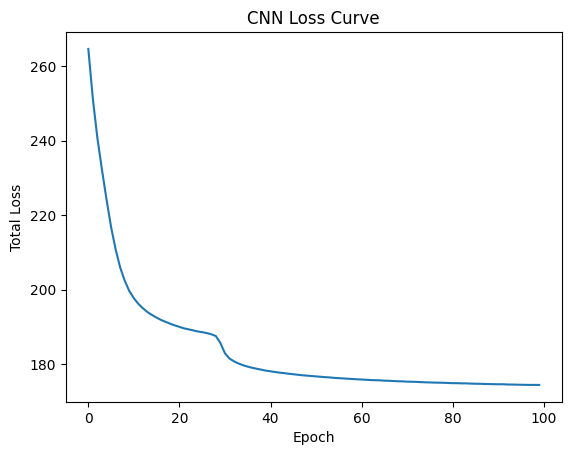

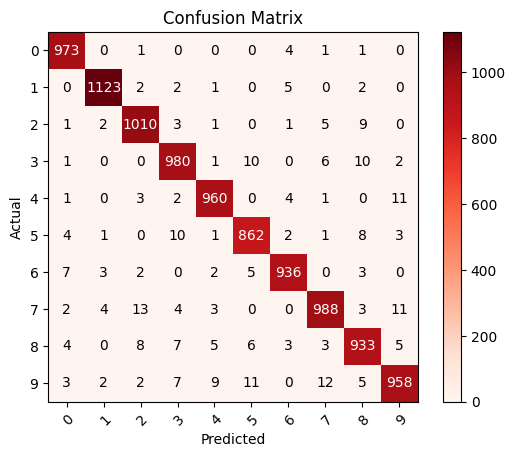

In [ ]:
cnn_losses = cnn.train_all(train_dataset, batch_size=batch, lr=iteration_step, epochs=epoch)
plt.plot(cnn_losses)
plt.title("CNN Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.show()
conf_matrix(cnn)

MLP Training: 100%|██████████| 11800/11800 [00:56<00:00, 210.57it/s]


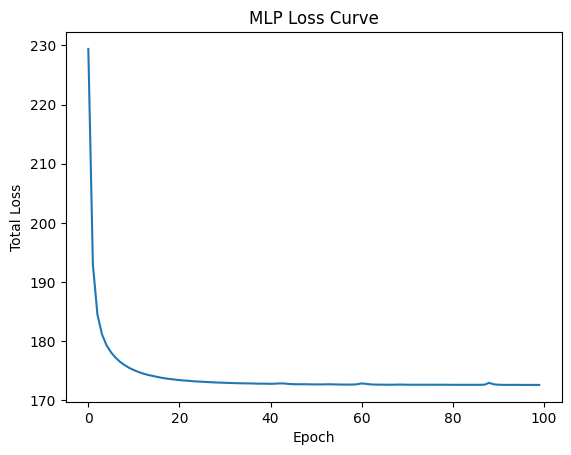

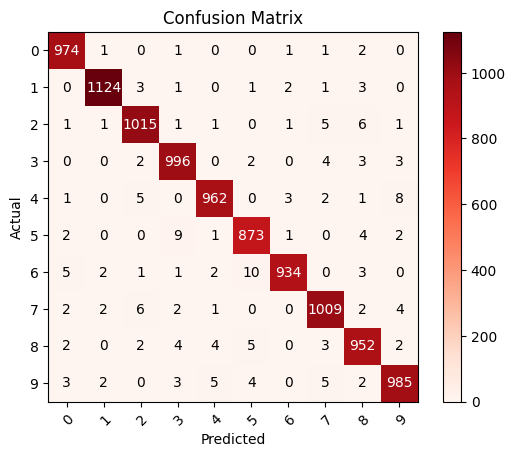

In [ ]:
mlp_losses = mlp.train_all(train_dataset, batch_size=batch, lr=iteration_step, epochs=epoch)
plt.plot(mlp_losses)
plt.title("MLP Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.show()
conf_matrix(mlp)